In [1]:
import pandas as pd

# Load the datasets
file_path1 = '/content/Unemployment in India.csv'
file_path2 = '/content/Unemployment_Rate_upto_11_2020.csv'

unemployment_data1 = pd.read_csv(file_path1)
unemployment_data2 = pd.read_csv(file_path2)

# Display the first few rows of each dataset
print(unemployment_data1.head())
print(unemployment_data2.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0 

In [2]:
# Basic information about the datasets
print(unemployment_data1.info())
print(unemployment_data2.info())

# Check for missing values in both datasets
missing_values1 = unemployment_data1.isnull().sum()
missing_values2 = unemployment_data2.isnull().sum()
print(f'Missing values in dataset 1:\n{missing_values1}')
print(f'Missing values in dataset 2:\n{missing_values2}')

# Inspecting columns and data types
print(unemployment_data1.columns)
print(unemployment_data2.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------             

In [16]:
# Drop any irrelevant columns (example)
unemployment_data2 = unemployment_data2.drop(columns=['longitude','latitude'], errors='ignore')

# Merge the datasets if required (example)
merged_data = pd.merge(unemployment_data1, unemployment_data2, on='Region')

# Display the merged data
print(merged_data.head())

           Region       Date_x  Frequency_x  \
0  Andhra Pradesh   31-05-2019      Monthly   
1  Andhra Pradesh   31-05-2019      Monthly   
2  Andhra Pradesh   31-05-2019      Monthly   
3  Andhra Pradesh   31-05-2019      Monthly   
4  Andhra Pradesh   31-05-2019      Monthly   

    Estimated Unemployment Rate (%)_x   Estimated Employed_x  \
0                                3.65             11999139.0   
1                                3.65             11999139.0   
2                                3.65             11999139.0   
3                                3.65             11999139.0   
4                                3.65             11999139.0   

    Estimated Labour Participation Rate (%)_x   Area       Date_y  \
0                                       43.24  Rural   31-01-2020   
1                                       43.24  Rural   29-02-2020   
2                                       43.24  Rural   31-03-2020   
3                                       43.24  Rural   3

In [9]:
# Display the columns and first few rows of the dataset
print(merged_data.columns)
print(merged_data.head())

Index(['Region', ' Date_x', ' Frequency_x',
       ' Estimated Unemployment Rate (%)_x', ' Estimated Employed_x',
       ' Estimated Labour Participation Rate (%)_x', 'Area', ' Date_y',
       ' Frequency_y', ' Estimated Unemployment Rate (%)_y',
       ' Estimated Employed_y', ' Estimated Labour Participation Rate (%)_y',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')
           Region       Date_x  Frequency_x  \
0  Andhra Pradesh   31-05-2019      Monthly   
1  Andhra Pradesh   31-05-2019      Monthly   
2  Andhra Pradesh   31-05-2019      Monthly   
3  Andhra Pradesh   31-05-2019      Monthly   
4  Andhra Pradesh   31-05-2019      Monthly   

    Estimated Unemployment Rate (%)_x   Estimated Employed_x  \
0                                3.65             11999139.0   
1                                3.65             11999139.0   
2                                3.65             11999139.0   
3                                3.65             11999139.0   
4    

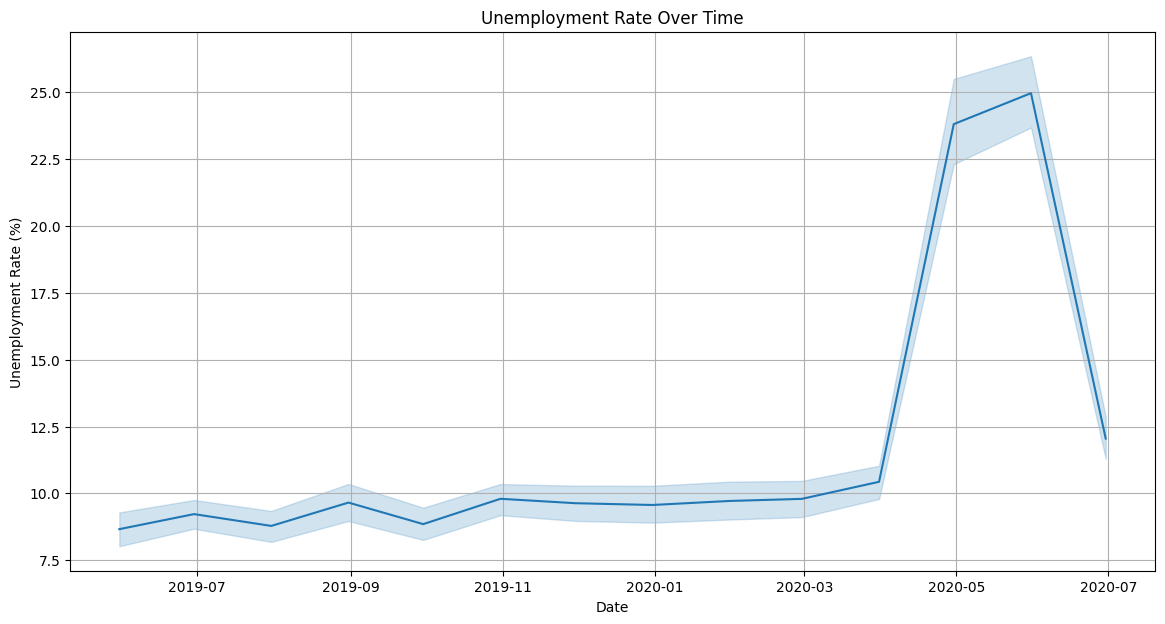

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and clean the dataset
#merged_data = pd.read_csv('/mnt/data/your_merged_data.csv')

# Strip leading/trailing spaces from column names
merged_data.columns = merged_data.columns.str.strip()

# Convert 'Date_x' column to datetime format
merged_data['Date_x'] = pd.to_datetime(merged_data['Date_x'], format='mixed')

# Plot the unemployment rate over time using 'Date_x' and 'Estimated Unemployment Rate (%)_x'
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_data, x='Date_x', y='Estimated Unemployment Rate (%)_x')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [22]:
# Check the data types of the columns
print(merged_data.dtypes)

Region                                               object
Date_x                                       datetime64[ns]
Frequency_x                                          object
Estimated Unemployment Rate (%)_x                   float64
Estimated Employed_x                                float64
Estimated Labour Participation Rate (%)_x           float64
Area                                                 object
Date_y                                               object
Frequency_y                                          object
Estimated Unemployment Rate (%)_y                   float64
Estimated Employed_y                                  int64
Estimated Labour Participation Rate (%)_y           float64
Region.1                                             object
Month                                                 int32
Year                                                  int32
dtype: object


In [23]:
# Convert the 'Estimated Unemployment Rate (%)_x' column to numeric
merged_data['Estimated Unemployment Rate (%)_x'] = pd.to_numeric(merged_data['Estimated Unemployment Rate (%)_x'], errors='coerce')

# Drop rows with NaN values resulting from the conversion
merged_data = merged_data.dropna(subset=['Estimated Unemployment Rate (%)_x'])

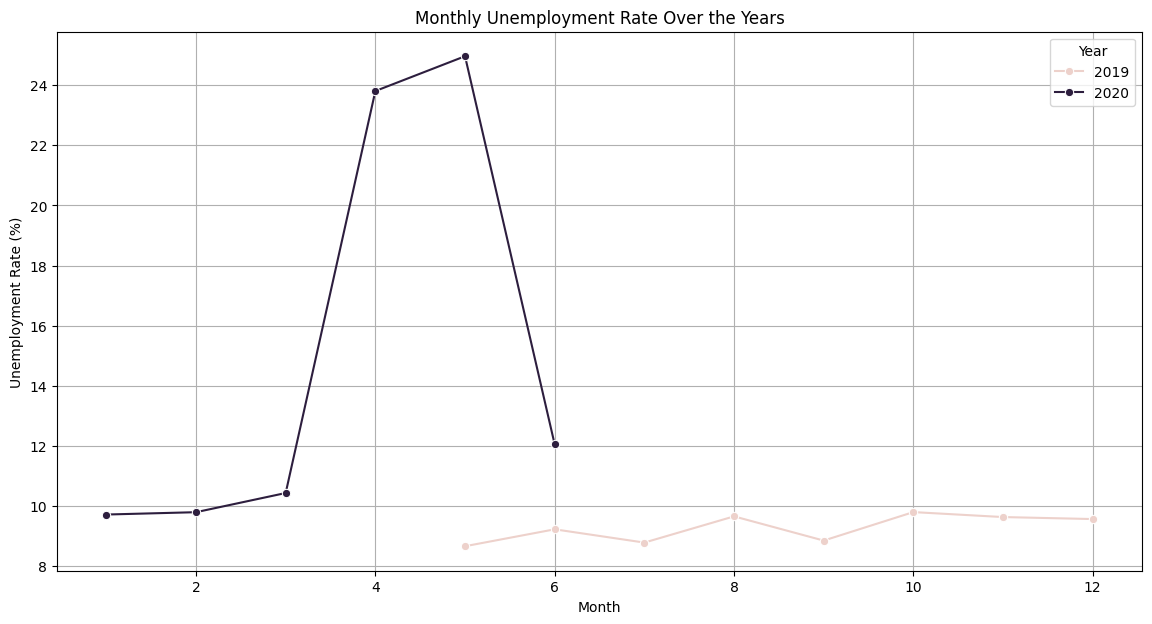

In [24]:
# Extract month and year from the date
merged_data['Month'] = merged_data['Date_x'].dt.month
merged_data['Year'] = merged_data['Date_x'].dt.year

# Group by month and year and calculate the mean unemployment rate
monthly_data = merged_data.groupby(['Year', 'Month'])['Estimated Unemployment Rate (%)_x'].mean().reset_index()

# Plot the monthly unemployment rate
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_data, x='Month', y='Estimated Unemployment Rate (%)_x', hue='Year', marker='o')
plt.title('Monthly Unemployment Rate Over the Years')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


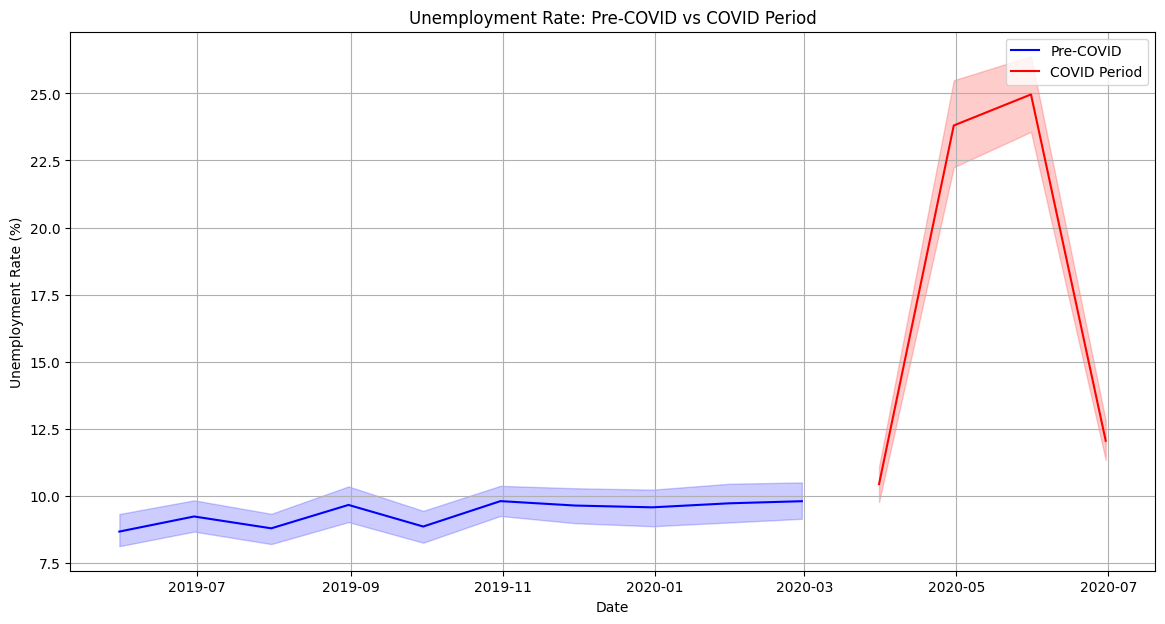

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the COVID-19 period start date
covid_start_date = '2020-03-01'

# Strip leading/trailing spaces from column names (if not done already)
merged_data.columns = merged_data.columns.str.strip()

# Use the correct date column name, e.g., 'Date_x'
date_column = 'Date_x'

# Split the data into pre-COVID and COVID periods
pre_covid_data = merged_data[merged_data[date_column] < covid_start_date]
covid_data = merged_data[merged_data[date_column] >= covid_start_date]

# Plot comparison
plt.figure(figsize=(14, 7))
sns.lineplot(data=pre_covid_data, x=date_column, y='Estimated Unemployment Rate (%)_x', label='Pre-COVID', color='blue')
sns.lineplot(data=covid_data, x=date_column, y='Estimated Unemployment Rate (%)_x', label='COVID Period', color='red')
plt.title('Unemployment Rate: Pre-COVID vs COVID Period')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()
